<a href="https://colab.research.google.com/github/thiagoFatecOurinhos/python/blob/master/k_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import das bibliotecas úteis: numpy, pandas e sklearn:**

In [96]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *


**Carregamento do dataset de ataques DDoS (10%):**

In [97]:
dataset = np.array(pd.read_csv("/content/drive/MyDrive/Datasets/dataset_preprocessado_10perc_bin.csv"))

**Recortes: matriz x contém as features enquanto o vetor y contém as labels:**

In [98]:
X = dataset[:, 0:77] # X == features
y = dataset[:, 78]   # y == rótulos


**Utilizando GridSearchCV para encontrar os melhores parâmetros:**

In [103]:
grid_params = {
    'n_neighbors': [1,3,5],
    'metric': ['euclidean','manhattan'],
    }

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 10,
    error_score = 'raise'
    )

gs_results = gs.fit(X, y)
print(gs_results.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'metric': 'manhattan', 'n_neighbors': 1}


**Treinamento e testes:**

In [104]:
clf1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1)
clf1_pred = cross_val_predict(clf1, X, y, cv=10)
conf_clf1 = confusion_matrix(y, clf1_pred)


print("********* Desempenho KNN **********")
print("Acuracia:", accuracy_score(y, clf1_pred)*100)
print("AUC:", roc_auc_score(y, clf1_pred)*100)
print("Precision:", precision_score(y, clf1_pred)*100)
print("Recall:", recall_score(y, clf1_pred)*100)
print("F1:", f1_score(y, clf1_pred)*100)
print("***********************************************************")


********* Desempenho KNN **********
Acuracia: 99.42001735608909
AUC: 99.4244485497397
Precision: 98.96193771626297
Recall: 99.4404923667173
F1: 99.20063789494668
***********************************************************


**Observando a matriz de confusão:**


In [105]:
print(conf_clf1)

[[43857   261]
 [  140 24882]]


Lembrando: 

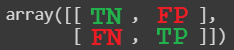